# Practical introduction to Neural Networks
#Author : Geoffrey ROMAN-JIMENEZ (PhD)
#email : grj@mailoo.org
#Date : around feb. 2019 
```
Copyright 2019 G. ROMAN-JIMENEZ

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
```

--------------------------------------



Hello folks. 

Here is a small course that -- I hope -- will help any beginner to understand and practice the foundations and bases of **Artificial Neural Network (ANN)**. 
It can be view as an introduction to deep learning, even if it has been originally set for any nerds that would like to understand the learning of ANN more **deeply**. 

Therefore, instead of using any of the beautiful deep-learning framework available out there, I will rather only use the library **numpy** (and **matplotlib** to plot stuffs (^o^)/ ). 
In that way, we will have to code everything from scratch. 

It is also worth noting that I won't push any mathematical proof in this notebook, the definition and algorithm that I will give are to be taken **as is**. My stand is that, to understand it we need to pratice it: and that the beauty of computers: it let us **practice stuff by ourself \o/**. However, once you will (inevitably) understand how it works, I would warmly recommend you to go check some mathematical proofs :)

All these considerations apart, let's begin!

Hope you'll like it.

Geo.

In [778]:
###############################
#### LIBRARIES IMPORTATION ####
###############################
# We'll use only numpy and matplotlib 
#    (\______/)
#    ( ͡° ͜ ʖ ͡°)
#     \╭☞   \╭☞
import numpy as np 
import matplotlib.pyplot as plt

## 1. A simple linear classification problem 

Let's start with a very simple case.

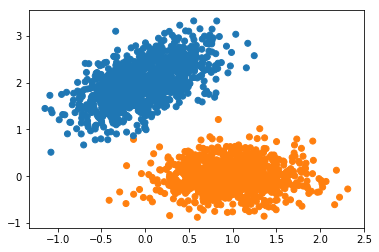

In [779]:
###############################
####### LOADING DATASET #######
###############################
# Let's load a given dataset
with np.load('sd.npz') as data:
    X = data['X']
    C = data['C']
# and plot the dots
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
C = C[randomize]
plt.scatter(X[:,0], X[:,1], c=['tab:orange' if p>=0.5 else "tab:blue" for p in C ])
plt.show()

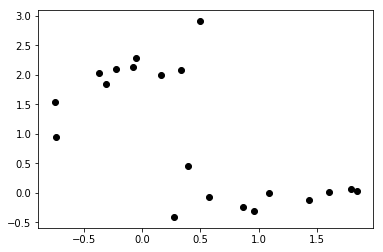

In [349]:
with np.load('sd_nocolor.npz') as data:
    Xnew = data['X']
    Cnew = data['C']
Cnew = None # [colors] ╯°_°）╯︵ [sɹoloɔ] ... oups .... we just lost our colors 
plt.scatter(Xnew[:,0], Xnew[:,1], c="black")
plt.show()

If we want to find the color for each of these new dots (and we **do**!), a simple linear classifier will do the job :)

So let's learn to automatically colorify these dots using our already-well-colored-dataset, using a simple Artificial Neuron !

----------------------------------

Let's take a look of what Artificial Neuron (AN) corresponds to.

but FIRST ! 

**Question**: 
- What are my inputs? 
- What are my outputs?

**Answer**:
- The inputs are my dots
- The outputs are my colors

# We're ready!

------------------------

An AN is defined as : <img src="./AN.png" width="300" />

$$ y = \varphi \Bigg( 
\begin{bmatrix} x_{1}    &   x_{2} \\ \end{bmatrix}. \begin{bmatrix} w_1 \\ w_2 \end{bmatrix} +b\Bigg)
$$

- $\mathbf{x}=\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$ is the input (a dot is defined by its two coordinates $x_1$ and $x_2$)
- $y$ is the output of the AN
- $\varphi(.) $ is a non-linear function that will place the results of $W.\mathbf{x} + b$ in a domain that I want (useful for many reason and but let's forget about for now.)

------------------------ 
In our context:

We want our AN to answer $y=1$, if the input dot $\mathbf{x}$ is supposed to be **<font color=orange>Orange</font>**. 

Conversely, we want our AN to answer $y=0$, if the input dot $\mathbf{x}$ is supposed to be **<font color=blue>Blue</font>**. 

### Let's create an AN \o/ !

To do so, first, we need a bias $b$ and weigths $W$

In [350]:
#We don't know the values so we'll put random numbers (that's an effective rule of thumb btw)
b = np.random.normal(size=1) # that's my bias
print("b:", b)
W = np.random.normal(size=2) # that's my weights for the articial neuron
print("W:", W)

b: [-1.39126958]
W: [-0.87632184 -0.52225269]


We also need a non-linear function $\varphi(.) $.

For these experimentations, since we only consider a linear classification, I will use the *insanely-cool-but-sadly-never-used-nowadays* **heaviside** function !

$$\varphi(x) =   \begin{cases}
    \scriptstyle 0  & if x<0.\\
    \scriptstyle 1  & if x \geq 0.
  \end{cases}  $$
  
```
note: with a heaviside function, our AN is actually a Perceptron (invented by **Rosenbalt**, "Widrow" and "Hoff" in the early 60s!)
```
 <img src="./nn_timeline_perceptron.png" width="500" />

In [351]:
# definition of the non-linear heaviside function
def heaviside(x):
    return 1 if x>=0 else 0

Let's compute the output for a $x$ for which I know the answer (the color $c$). 

In [352]:
x = X[0]
y = heaviside(np.dot(x, W)+b)
print(x, y, C[0])
#y1 = nl_sigmoid(l1)

[-0.17572483  2.3304237 ] 0 0.0


Good good... what about all my data

In [353]:
n_error = 0
for n in range(len(X)):
    x = X[n]
    y = heaviside(np.dot(x, W)+b)
    if C[n] != y:
        n_error += 1
print("Number of ill-classified dots:", n_error)
print("percentage of error:", 100*n_error/len(X), "%")

Number of ill-classified dots: 1000
percentage of error: 50.0 %


For the moment, our AN give me random answer... 

**Let's train it !**

### Train a perceptron
Training an Perceptron is very simple.

> For each couple of *dot*/*color* ($\mathbf{x}$, $c$) of our dataset :
>> 1. We compute the output of our AN:
$$y = \varphi ( W.\mathbf{x} +b )$$
>> 2. we update the weights
    >>> if $y=0$ and $c=1$:
     $$ W = W + \mathbf{x} $$
     $$ b = b +1 $$
    >>> else if $y=1$ and $c=0$:
     $$ W = W - \mathbf{x} $$
     $$ b = b - 1 $$
     
     
---------------------------
### Generalization
In order to be more generalizable (because science!) let's just modify our algorithm a bit:
> For each couple of *dot*/*color* ($\mathbf{x}$, $c$) of our dataset :
>> 1. We compute the output of our AN:
$$y = \varphi ( W.\mathbf{x} +b )$$
>> 2. We measure the error between the *expected output* $c$ and $y$:
$$ \mathcal{E} = c - y $$
>> 3. we update the weights: 
     $$ W = W + \mathbf{x} . \mathcal{E} $$
     $$ b = b + \mathcal{E} $$ 
     
```  
Note: This algorithm is strictly equivalent to the first one
```

In [354]:
n_error = 0
# for every dot of X
for n in range(len(X)):
    # we compute the output y
    y = heaviside(np.dot(X[n], W)+b) 
    # we measure the error
    error = C[n] - y
    # we update the weights
    W += X[n]*error
    # we update the bias
    b += error
    n_error += error**2
    # print the error and weigths to see if we're making any progress 
    if error !=0:
        print("Error found:", n)
        print("\t", "error:", error)
        print("\t updated W and b:", W, b)

Error found: 4
	 error: 1.0
	 updated W and b: [0.13051847 0.0267606 ] [-0.39126958]
Error found: 5
	 error: 1.0
	 updated W and b: [0.9831915  0.81644688] [0.60873042]
Error found: 6
	 error: -1.0
	 updated W and b: [ 0.88843182 -1.32927973] [-0.39126958]
Error found: 11
	 error: 1.0
	 updated W and b: [ 1.34248579 -0.80174126] [0.60873042]
Error found: 112
	 error: -1.0
	 updated W and b: [ 0.39664883 -3.01347557] [-0.39126958]
Error found: 115
	 error: 1.0
	 updated W and b: [ 0.92975555 -2.91594073] [0.60873042]
Error found: 165
	 error: 1.0
	 updated W and b: [ 1.59025341 -2.32685824] [1.60873042]
Error found: 331
	 error: 1.0
	 updated W and b: [ 1.45721469 -1.53985143] [2.60873042]
Error found: 333
	 error: -1.0
	 updated W and b: [ 1.3919509  -3.24270213] [1.60873042]
Error found: 436
	 error: 1.0
	 updated W and b: [ 2.02996207 -2.4686816 ] [2.60873042]
Error found: 1181
	 error: -1.0
	 updated W and b: [ 2.03484469 -3.49399181] [1.60873042]
Error found: 1485
	 error: 1.0
	 up

In [355]:
# Let's measure our classification rate again
n_error = 0
for n in range(len(X)):
    x = X[n]
    y = heaviside(np.dot(x, W)+b)
    if C[n] != y:
        n_error += 1
print("Number of ill-classified dots:", n_error)
print("percentage of error:", 100*n_error/len(X), "%")

Number of ill-classified dots: 6
percentage of error: 0.3 %


### Okay... 

Soooo it works! we have less errors! 

```
Note: sometimes, depending on our random initialization, 
there are some remaining errors (sometimes don't). 
```

Oh wait! Our AN learned on all our dots... but it only saw each dot once!
    
Let's use **Epochs** !

```
Note : One Epoch is when an ENTIRE dataset is passed forward and backward 
through the neural network.
```


In [356]:
#b = np.random.normal(size=1)
#W = np.random.normal(size=2)
n_epoch = 100 # my AN will learn by possibly seeing the dataset 100 times !!! for the sake of science 
randomize = np.arange(len(X))

for e in range(n_epoch):
    n_error = 0
    for n in range(len(X)):
        # we compute the output y
        y = heaviside(np.dot(X[n], W)+b) 
        # we measure the error
        error = C[n] - y
        # we update the weights
        W += X[n]*error
        # we update the bias
        b += error
        if error != 0:
            n_error += 1
    print("epoch:", e, "percentage of error:", 100*n_error/len(X), "%")
    
    # Here is a meta-rule
    ## in any case, stop the run of epochs if every point in well classified
    ### to save some computation time
    if n_error/len(X) == 0:
        break
        

epoch: 0 percentage of error: 0.25 %
epoch: 1 percentage of error: 0.05 %
epoch: 2 percentage of error: 0.0 %


### 0 errors! (•̀ᴗ•́)و ̑̑
#### That's what we were looking for !

Basically it means that, on our training dataset, the AN is always giving the correct color

In [359]:
# let's find the colors for the new dots!
pred_C = []
for n in range(len(Xnew)):
    y = heaviside(np.dot(Xnew[n], W)+b) 
    pred_C.append(y)
pred_color = ["tab:orange" if p>0 else "tab:blue" for p in pred_C ]

# in parallel, let's also check out the learned colors
learned_C = []
for n in range(len(X)):
    y = heaviside(np.dot(X[n], W)+b) 
    learned_C.append(y)
learned_color = ["tab:orange" if p>0 else "tab:blue" for p in learned_C ]


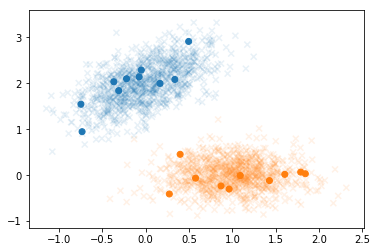

In [360]:
# plots the predicted colors
plt.scatter(Xnew[:,0], Xnew[:,1], c=pred_color)
# plots the learned colors (in transparency)
plt.scatter(X[:,0], X[:,1], marker='x' ,c=learned_color, alpha=0.1)
plt.show()

#### ( •_•)
## ( •_•)>⌐■-■
# (⌐■_■) #Yeeeaaahhh


# Notes :

- The learning algorithm for perceptron is guaranteed to find the combination of weights that get the right answer for every inputs of the dataset used for training... **if such weights exists**


- **Sometimes**, especially when the problem is to simple, the initialization give a perfect score with our dataset : our AN has nothing to learn ! (TGTF : Too good to fail!)





---------------------------------
---------------------------------
---------------------------------


## 2. A more complex problem : XOR

In [742]:
# Let's generate a more complex dataset 
def cd_generator(n=[1000, 1000, 1000, 1000]):
    n_blue1 = n[0]
    n_blue2 = n[1]
    blue_u1 = (10, 10)
    blue_u2 = (0, 0)
    blue_s1 = [[1, 0], [0, 1]]
    blue_s2 = [[1, 0], [0, 1]]
    x_blue = np.concatenate( ( np.random.multivariate_normal(blue_u1, blue_s1, (n_blue1)), np.random.multivariate_normal(blue_u2, blue_s2, (n_blue2))), axis=0)
    y_blue = np.zeros(len(x_blue))

    n_orange1 = n[2]
    n_orange2 = n[3]
    orange_u1 = (10, 0)
    orange_u2 = (0, 10)
    orange_s1 = [[1, 0], [0, 1]]
    orange_s2 = [[1, 0], [0, 1]]
    x_orange = np.concatenate( ( np.random.multivariate_normal(orange_u1, orange_s1, (n_orange1)), np.random.multivariate_normal(orange_u2, orange_s2, (n_orange2))), axis=0)
    y_orange = np.ones(len(x_orange))

    X = np.concatenate((x_blue, x_orange),axis=0)
    #X = (X - np.mean(X)) / np.std(X)
    Y = np.concatenate((y_blue, y_orange), axis=0)

    ## Lets randomize a bit ...
    randomize = np.arange(len(X))
    np.random.shuffle(randomize)
    X = X[randomize]
    Y = Y[randomize]

    ## resizing of Y to fit with our network 
    Y = np.expand_dims(Y, axis=1)
    return X, Y

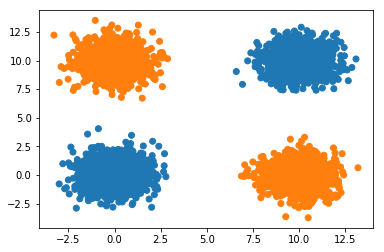

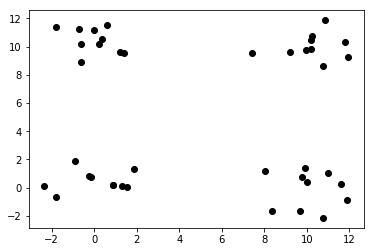

In [743]:
# our training dataset
X, C = cd_generator()
plt.scatter(X[:,0], X[:,1], c=['tab:orange' if p>=0.5 else "tab:blue" for p in C ])
plt.show()

# our test dataset 
Xnew, Cnew = cd_generator(n=[10,10,10,10])
plt.scatter(Xnew[:,0], Xnew[:,1], c="black")
plt.show()

## The XOR problem!

Here is the famous XOR problem, which signed the beginning of the AI winter 

<img src="./nn_timeline_xor.png" width="500" />

The problem is quite simple to understand: one perceptron won't be able to learn how to give the correct answers! 

### let's prove it by using our own code :)


In [744]:
# we create a perceptron
b = np.random.normal(size=1)
print("b:", b)
W = np.random.normal(size=2)
print("W:", W)

# we train it on our dataset
n_error = 0
n_epoch = 10
for e in range(n_epoch):
    n_error = 0
    for n in range(len(X)):
        y = heaviside(np.dot(X[n], W)+b) 
        error = C[n] - y
        W += X[n]*error
        b += error
        if error != 0:
            n_error += 1
    print("epoch:", e, "percentage of error:", 100*n_error/len(X), "%")
    if n_error/len(X) == 0:
        break
        

b: [-0.47703033]
W: [0.35794781 0.12655443]
epoch: 0 percentage of error: 48.45 %
epoch: 1 percentage of error: 49.2 %
epoch: 2 percentage of error: 48.625 %
epoch: 3 percentage of error: 48.025 %
epoch: 4 percentage of error: 49.0 %
epoch: 5 percentage of error: 48.875 %
epoch: 6 percentage of error: 48.15 %
epoch: 7 percentage of error: 48.725 %
epoch: 8 percentage of error: 50.0 %
epoch: 9 percentage of error: 48.65 %


#### We are clearly not making any progress ...

100, 1000, 100000 epochs won't change anything. The problem is clearly that our AN is making a linear separation on our domain... where two separations are clearly needed!

-----------------------------





##### - $1^{st}$ solution : The kernel trick

Here come the base of the **SVM**, the absolutely fantastic **kernel trick** ! 

<img src="./nn_timeline_svm.png" width="500" />


The main idea of the Kernel Trick is to make a linear separation on a transformed spaces. 

For instance, instead of taking out input dots as is, we:

1. Transform them to suit with a simple linear classification problem
2. Classify them with our already-implemented algorithm !

#### Kernel
First, let's normalize our dataset $X$ 

$$ X_{norm} = \frac{X - µ_X}{\sigma_{X}} $$

Second, let's create a new dataset $Z$, by transforming each dots $\mathbf{x}$ of the dataset $X_norm$ as :
$$ z = x_1 . x_2 $$


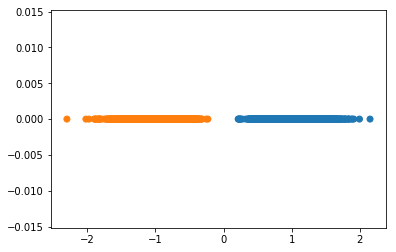

In [745]:
# Let's do that
X_norm = (X - np.mean(X)) / np.std(X)
Z = []
for n in range(len(X)):
    z = X_norm[n][0]*X_norm[n][1]
    Z.append(z)

# and plot it !
plt.scatter(Z, np.zeros(len(Z)), c=['tab:orange' if p>=0.5 else "tab:blue" for p in C ])
plt.show()

Now it seems clear that our AN will do the job :)

-> Let's try!

In [746]:
# We re-take our algorithm

# we create a perceptron
b = np.random.normal(size=1)
print("b:", b)
W = np.random.normal(size=1)
print("W:", W)


# we train it on the Z dataset
n_error = 0
n_epoch = 100
for e in range(n_epoch):
    n_error = 0
    for n in range(len(Z)):
        z = Z[n]
        y = heaviside(z*W+b) 
        error = C[n] - y
        W += z*error
        b += error
        if error != 0:
            n_error += 1
    print("epoch:", e, "percentage of error:", 100*n_error/len(Z), "%")
    if n_error/len(Z) == 0:
        break

b: [0.26126547]
W: [1.35830156]
epoch: 0 percentage of error: 0.1 %
epoch: 1 percentage of error: 0.0 %


<img src="./zero-error.png" width="500" />


In [747]:
# let's predict the colors for the new dots!
Xnew_norm = (Xnew - np.mean(Xnew)) / np.std(Xnew)

Znew = []
for n in range(len(Xnew_norm)):
    z = Xnew_norm[n][0]*Xnew_norm[n][1]
    Znew.append(z)
    
pred_C = []
for n in range(len(Znew)):
    y = heaviside(np.dot(Znew[n], W)+b) 
    pred_C.append(y)
pred_color = ["tab:orange" if p>0 else "tab:blue" for p in pred_C ]

learned_C = []
for n in range(len(Z)):
    y = heaviside(np.dot(Z[n], W)+b) 
    learned_C.append(y)
learned_color = ["tab:orange" if p>0 else "tab:blue" for p in learned_C ]

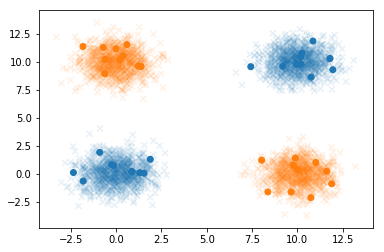

In [748]:
# plots the predicted colors
plt.scatter(Xnew[:,0], Xnew[:,1], c=pred_color)
# plots the learned colors (in transparency)
plt.scatter(X[:,0], X[:,1], marker='x' ,c=learned_color, alpha=0.1)
plt.show()

##### We did it ! 
So it was possible using one Perceptron after all 

**Main drawback** : we need to know the transformation $T: X \rightarrow Z$

--------------------------

## 1-layer neural network 

Finally !


### Okay ....
So now we want to classify these dots using a network of neurons. To do so, a 1-hidden layer composed of 2 AN will do the job. 

So what is a 1-hidden layer composed of 2-AN? 

### Architecture:

<img src="./1lnn.png" width="500" />

```
Nice picture to get the architecture.... 
but not really helpful to really understand what do we need to do. 
('cause we DO want to code it ! )
```
Here the output $y$ is computed through the outputs of three neurons $h_1$ and $h_2$

$$  y =
\varphi \Bigg( 
\begin{bmatrix}
w_{out_1} & w_{out_2}     \\ 
\end{bmatrix}.
\varphi \Bigg( 
\begin{bmatrix}
w_{in(1,1)} & w_{in(1,2)}      \\
w_{in(2,1)} & w_{in(2,2)}      \\
\end{bmatrix}.
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}  + 
\begin{bmatrix} b_1 \\ b_2 \end{bmatrix} 
\Bigg)+ b 
\Bigg) $$

So we have : 

- input weights $W_{in}$ (2x2 matrix) and bias $b_{in}$ (vector of 2 scalars)
- output weights $W_{out}$ (2x1 matrix) and bias $b_{out}$ (1 scalar)

### Let's create it !

In [749]:
# my 1-layer neural network
## I want 2 neurons
n_neurons = 2 
## generate the weights and bias that will digest our inputs
W_in = np.random.random((2,n_neurons)) 
b_in = np.random.random(n_neurons)
print("W_in: \n", W_in)
print("b_in: \n", b_in)
## generate the weights and bias that will spit the output 
W_out = np.random.random((n_neurons,1))
b_out = np.random.random(1)
print("W_out: \n", W_out)
print("b_out: \n", b_out)


W_in: 
 [[0.61543289 0.57840047]
 [0.83991458 0.86898965]]
b_in: 
 [0.64284409 0.31583575]
W_out: 
 [[0.37906176]
 [0.15609802]]
b_out: 
 [0.1561467]


### The sigmoid non-linear function:
For these experiments, we define a brand-new badass non-linear function $\varphi$ : the **sigmoid** function !

$$\varphi(x) = \frac{1}{1+e^{-x}}$$

There are several reasons for the use of this function. But for now, let just consider that it have a continuous derivative that will be useful for the learning procedure that we'll see later. 

Its derivative is very simple:
$$\varphi'(x) = \varphi(x) . (1-\varphi(x))$$



In [750]:
# definition of the sigmoid function (with its derivative!)
def sigmoid(x, derivative=False):
    y = 1/(1+np.exp(-x))
    if derivative == True:
        return y * (1-y)
    return y


### Learning procedure:
We define our learning algorithm as follows :

> For each couple of *dot*/*color* ($\mathbf{x}$, $c$) of our dataset :
>> 1. We compute the output of our AN:
$$s_{in} = W_{in}.\mathbf{x} +b_{in} $$
$$h = \varphi ( s_{in}  ) $$
$$s_{out} = W_{out}.\mathbf{x} +b_{out} $$
$$y = \varphi ( s_{out} ) $$
>> 2. We measure the error between the *expected output* $c$ and $y$:
$$ \mathcal{E} = c - y $$
>> 3. We compute the error due to the weights
$$ \delta_{out} = \mathcal{E} \times \varphi'(s_{out}) $$
$$ \delta_{in} = \delta_{out}^T.W_{out}  \times \varphi'(s_{in}) $$
>> 3. we update the weights:       
$$ W_{out} =  W_{out} + h^T. \delta_{out} $$
$$ b_{out} =  b_{out} + \delta_{out} $$
$$ W_{in}  =  W_{in}  + x^T . \delta_{in} $$
$$ b_{in}  =  b_{in}  + \delta_{in} $$

```
This learning procedure is called Gradient Descent. 
It's very related to our first learning algorithm, 
BUT this time we tke into account the "amount" of error 
    - previously the error was either -1 or 1
    - now the error is between -1 and 1 !
```

-> Let's implement that

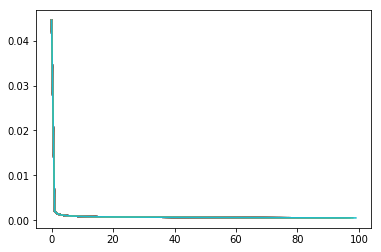

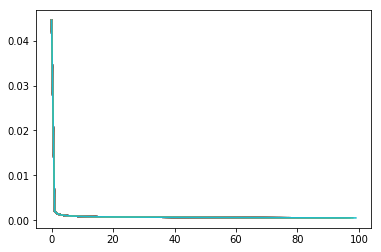

In [751]:
from IPython.display import display, clear_output

# An important step here : 
## We normalize the data : (x-µ)/s
## normalization will always help the algorithm to learn 
X_norm = (X - np.mean(X)) / np.std(X)
Xnew_norm = (Xnew - np.mean(Xnew)) / np.std(Xnew)

learning_rate = 1
n_epoch = 100
l_epoch = []

# to plot the error
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 

for e in range(n_epoch):
    error_rate = 0
    for n in range(len(X)):
        x = X_norm[n]
        x = np.expand_dims(x, axis=0) # a little trick here
        # we compute the outputs of the first layer
        l_in = np.dot(x, W_in)+b_in
        ## and compute their activation 
        h = sigmoid(l_in) 
        # we compute the output s of the last layer
        l_out = np.dot(h, W_out)+b_out
        ## and the activation of the output neuron (out output y)
        y = sigmoid(l_out)
        # we compute the error
        error = C[n] - y
        error_rate += error**2
        # we compute the delta for each layer
        ## first the delta between 
        y_delta = error * sigmoid(l_out, derivative=True) 
        h_delta = np.dot(y_delta,W_out.T) * sigmoid(l_in, derivative=True)
        W_out += learning_rate * np.dot(h.T, y_delta)
        b_out += learning_rate * y_delta.squeeze()
        W_in += learning_rate * np.dot(x.T, h_delta)
        b_in += learning_rate * h_delta.squeeze()

    l_epoch.append(error_rate.squeeze()/len(X))
    clear_output(wait = True)
    #plt.pause(0.5)
    ax.plot(range(e+1), l_epoch, c="r")
    display(fig)

    if e%10 == 0:
        print("epoch:", e, "error:", error_rate/len(X))
    else :
        print("epoch:", e, "error:", error_rate/len(X), end="\r")
        

## The loss is getting lower and lower ＼(-o-)／

```
Note that it never reach the 0... It's due to the sigmoid function. 
Indeed the sigmoid function reach: 
                                    - 0 when x -> -∞ 
                                    - 1 when x -> ∞
Such values do not exist in our numerical computation. 
``` 


To get our predicted colors :

- if $y\geq0.5$, the predicted color is **<font color=orange>Orange</font>**. 
- if $y<0.5$, the predicted color is **<font color=blue>Blue</font>**. 


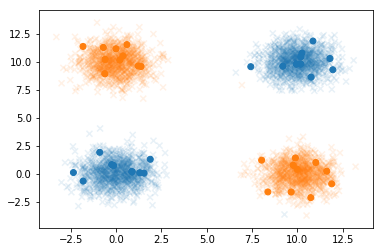

In [752]:
pred_C = []
for n in range(len(Xnew)):
    x = Xnew_norm[n]
    h = sigmoid(np.dot(x, W_in)+b_in)
    y = sigmoid(np.dot(h, W_out)+b_out)
    pred_C.append(y)
pred_color = ["tab:orange" if p>=0.5 else "tab:blue" for p in pred_C ]


learned_C = []
for n in range(len(X)):
    x = X_norm[n]
    h = sigmoid(np.dot(x, W_in)+b_in)
    y = sigmoid(np.dot(h, W_out)+b_out)
    learned_C.append(y)
learned_color = ["tab:orange" if p>=0.5 else "tab:blue" for p in learned_C ]

plt.scatter(Xnew[:,0], Xnew[:,1] ,c=pred_color)
plt.scatter(X[:,0], X[:,1], marker='x' ,c=learned_color, alpha=0.1)
plt.show()

# We just implement our first NN
<img src="https://s-media-cache-ak0.pinimg.com/564x/18/99/d2/1899d2b4a5532cb7b9ea862659ce5815.jpg">


---------------------------
# Let's try with a more tricky problem

In [755]:
def vcd_generator(n=[1000, 1000, 1000, 1000]):
    n_blue1 = n[0]
    n_blue2 = n[1]
    blue_u1 = (5, 5)
    blue_u2 = (0, 0)
    blue_s1 = [[1.5, 0], [0, 1.5]]
    blue_s2 = [[1.5, 0], [0, 1.5]]
    a = np.random.multivariate_normal(blue_u1, blue_s1, (n_blue1))
    a = np.array([x  for x in a if (2.5 <= x[0] < 7.5) and (2.5 <= x[1] < 7.5) ])
    b = np.random.multivariate_normal(blue_u2, blue_s2, (n_blue2))
    b = np.array([x  for x in b if (-2.5 <= x[0] < 2.5) and (-2.5 <= x[1] < 2.5) ])
    
    x_blue = np.concatenate( ( a , b ) , axis=0 )
    y_blue = np.zeros(len(x_blue))

    n_orange1 = n[2]
    n_orange2 = n[3]
    orange_u1 = (5, 0)
    orange_u2 = (0, 5)
    orange_s1 = [[1.5, 0], [0, 1.5]]
    orange_s2 = [[1.5, 0], [0, 1.5]]
    c = np.random.multivariate_normal(orange_u1, orange_s1, (n_orange1))
    c = np.array([x  for x in c if (2.5 <= x[0] < 7.5) and (-2.5 <= x[1] < 2.5) ])
    d = np.random.multivariate_normal(orange_u2, orange_s2, (n_orange2))
    d = np.array([x  for x in d if (-2.5 <= x[0] < 2.5) and (2.5 <= x[1] < 7.5) ])
    x_orange = np.concatenate( ( c, d ), axis=0)
    y_orange = np.ones(len(x_orange))

    X = np.concatenate((x_blue, x_orange),axis=0)
    #X = (X - np.mean(X)) / np.std(X)
    Y = np.concatenate((y_blue, y_orange), axis=0)

    ## Lets randomize a bit ...
    randomize = np.arange(len(X))
    np.random.shuffle(randomize)
    X = X[randomize]
    Y = Y[randomize]

    ## resizing of Y to fit with our network 
    Y = np.expand_dims(Y, axis=1)
    return X, Y

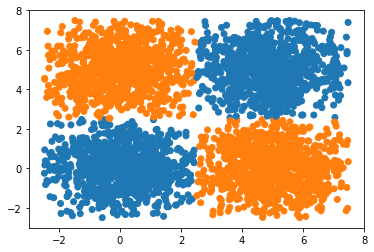

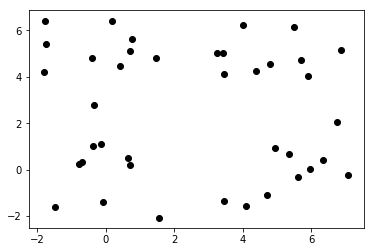

In [772]:
# our training dataset
X, C = vcd_generator()
plt.scatter(X[:,0], X[:,1], c=['tab:orange' if p>=0.5 else "tab:blue" for p in C ])
plt.show()

# our test dataset 
Xnew, Cnew = vcd_generator(n=[10,10,10,10])
plt.scatter(Xnew[:,0], Xnew[:,1], c="black")
plt.show()

In [757]:
# my 1-layer neural network
n_neurons = 2
W_in = np.random.random((2,n_neurons)) 
b_in = np.random.random(n_neurons)

W_out = np.random.random((n_neurons,1))
b_out = np.random.random(1)


# normalization of the data
X_norm = (X - np.mean(X)) / np.std(X)
Xnew_norm = (Xnew - np.mean(Xnew)) / np.std(Xnew)

n_epoch = 100
for e in range(n_epoch):
    error_rate = 0
    for n in range(len(X)):
        x = X_norm[n]
        x = np.expand_dims(x, axis=0) # a little trick here
        # we compute the outputs of the first layer
        l_in = np.dot(x, W_in)+b_in
        ## and compute their activation 
        h = sigmoid(l_in) 
        # we compute the output s of the last layer
        l_out = np.dot(h, W_out)+b_out
        ## and the activation of the output neuron (out output y)
        y = sigmoid(l_out)
        # we compute the error
        error = C[n] - y
        error_rate += error**2
        # we compute the delta for each layer
        ## first the delta between 
        y_delta = error * sigmoid(l_out, derivative=True) 
        h_delta = np.dot(y_delta,W_out.T) * sigmoid(l_in, derivative=True)
        W_out += np.dot(h.T, y_delta)
        b_out += y_delta.squeeze()
        W_in += np.dot(x.T, h_delta)
        b_in += h_delta.squeeze()
        
    if e%10 == 0:
        print("epoch:", e, "error:", error_rate/len(X))
    else :
        print("epoch:", e, "error:", error_rate/len(X), end="\r")

epoch: 0 error: [[0.19838762]]
epoch: 10 error: [[0.14027489]]
epoch: 20 error: [[0.13948593]]
epoch: 30 error: [[0.13909525]]
epoch: 40 error: [[0.1388789]]]
epoch: 50 error: [[0.13878258]]
epoch: 60 error: [[0.13874875]]
epoch: 70 error: [[0.13870398]]
epoch: 80 error: [[0.13854144]]
epoch: 90 error: [[0.13837075]]


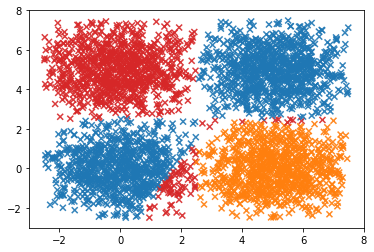

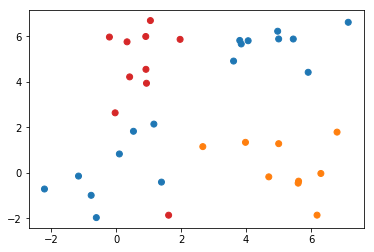

In [759]:
pred_C = []
for n in range(len(Xnew)):
    x = Xnew_norm[n]
    h = sigmoid(np.dot(x, W_in)+b_in)
    y = sigmoid(np.dot(h, W_out)+b_out)
    pred_C.append(y)
pred_color = ["tab:orange" if p>=0.5 else "tab:blue" for p in pred_C ]
# this is for printing errors in red
rw_pred_color = [pc if int(p>=0.5) == c  else "tab:red" for pc, p, c in zip(pred_color, pred_C, Cnew) ]

learned_C = []
for n in range(len(X)):
    x = X_norm[n]
    h = sigmoid(np.dot(x, W_in)+b_in)
    y = sigmoid(np.dot(h, W_out)+b_out)
    learned_C.append(y)
learned_color = ["tab:orange" if p>=0.5 else "tab:blue" for p in learned_C ]
# this is for printing errors in red
rw_learned_color = [pc if int(p>=0.5) == c else "tab:red" for pc, p, c in zip(learned_color, learned_C, C) ]

plt.scatter(X[:,0], X[:,1], marker='x' ,c=rw_learned_color, alpha=0.9)
plt.show()
plt.scatter(Xnew[:,0], Xnew[:,1] ,c=rw_pred_color)
plt.show()

not successful with 2 neurons.

Let's put more of them !

epoch: 0 error: [[0.10120437]]
epoch: 10 error: [[0.02535356]]
epoch: 20 error: [[0.01867428]]
epoch: 30 error: [[0.01655203]]
epoch: 40 error: [[0.01578462]]
epoch: 50 error: [[0.0152505]]]
epoch: 60 error: [[0.01526618]]
epoch: 70 error: [[0.0146772]]]
epoch: 80 error: [[0.0140721]]]
epoch: 90 error: [[0.01432219]]


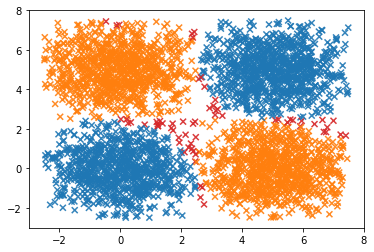

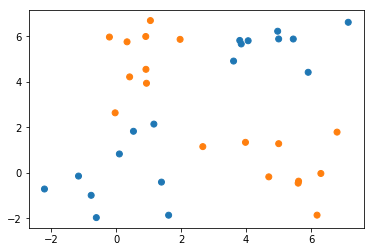

In [760]:
# my 1-layer neural network
n_neurons = 10
W_in = np.random.random((2,n_neurons)) 
b_in = np.random.random(n_neurons)

W_out = np.random.random((n_neurons,1))
b_out = np.random.random(1)

# normalization of the data
X_norm = (X - np.mean(X)) / np.std(X)
Xnew_norm = (Xnew - np.mean(Xnew)) / np.std(Xnew)

n_epoch = 100
for e in range(n_epoch):
    error_rate = 0
    for n in range(len(X)):
        x = X_norm[n]
        x = np.expand_dims(x, axis=0) # a little trick here
        # we compute the outputs of the first layer
        l_in = np.dot(x, W_in)+b_in
        ## and compute their activation 
        h = sigmoid(l_in) 
        # we compute the output s of the last layer
        l_out = np.dot(h, W_out)+b_out
        ## and the activation of the output neuron (out output y)
        y = sigmoid(l_out)
        # we compute the error
        error = C[n] - y
        error_rate += error**2
        # we compute the delta for each layer
        ## first the delta between 
        y_delta = error * sigmoid(l_out, derivative=True) 
        h_delta = np.dot(y_delta,W_out.T) * sigmoid(l_in, derivative=True)
        W_out += np.dot(h.T, y_delta)
        b_out += y_delta.squeeze()
        W_in += np.dot(x.T, h_delta)
        b_in += h_delta.squeeze()
        
    if e%10 == 0:
        print("epoch:", e, "error:", error_rate/len(X))
    else :
        print("epoch:", e, "error:", error_rate/len(X), end="\r")

# plot the results 
pred_C = []
for n in range(len(Xnew)):
    x = Xnew_norm[n]
    h = sigmoid(np.dot(x, W_in)+b_in)
    y = sigmoid(np.dot(h, W_out)+b_out)
    pred_C.append(y)
pred_color = ["tab:orange" if p>=0.5 else "tab:blue" for p in pred_C ]

rw_pred_color = [pc if int(p>=0.5) == c  else "tab:red" for pc, p, c in zip(pred_color, pred_C, Cnew) ]

learned_C = []
for n in range(len(X)):
    x = X_norm[n]
    h = sigmoid(np.dot(x, W_in)+b_in)
    y = sigmoid(np.dot(h, W_out)+b_out)
    learned_C.append(y)
learned_color = ["tab:orange" if p>=0.5 else "tab:blue" for p in learned_C ]
rw_learned_color = [pc if int(p>=0.5) == c else "tab:red" for pc, p, c in zip(learned_color, learned_C, C) ]

plt.scatter(X[:,0], X[:,1], marker='x' ,c=rw_learned_color, alpha=0.9)
plt.show()
plt.scatter(Xnew[:,0], Xnew[:,1] ,c=rw_pred_color)
plt.show()

#### It works for most cases, but there are still some errors

Let's use widely-used tricks : 

1- let's randomize the input at each epoch

2- let's use a learning rate 


```
This is what we call the Stochastic Gradient Descent \o/
```

From this we just modify our algorithm as : 

> For each couple of *dot*/*color* ($\mathbf{x}$, $c$) of our dataset took *RANDOMLY*:
>> 1. We compute the output of our AN:
$$s_{in} = W_{in}.\mathbf{x} +b_{in} $$
$$h = \varphi ( s_{in}  ) $$
$$s_{out} = W_{out}.\mathbf{x} +b_{out} $$
$$y = \varphi ( s_{out} ) $$
>> 2. We measure the error between the *expected output* $c$ and $y$:
$$ \mathcal{E} = c - y $$
>> 3. We compute the error due to the weights
$$ \delta_{out} = \mathcal{E} \times \varphi'(s_{out}) $$
$$ \delta_{in} = \delta_{out}^T.W_{out}  \times \varphi'(s_{in}) $$
>> 3. we update the weights:       
$$ W_{out} = \eta . W_{out} + h^T. \delta_{out} $$
$$ b_{out} = \eta . b_{out} + \delta_{out} $$
$$ W_{in}  = \eta . W_{in}  + x^T . \delta_{in} $$
$$ b_{in}  = \eta . b_{in}  + \delta_{in} $$

```
𝜂 is the learning rate
```


epoch: 0 error: [[0.25011976]]
epoch: 10 error: [[0.0118335]]
epoch: 20 error: [[0.00831535]]
epoch: 30 error: [[0.00693286]]
epoch: 40 error: [[0.00613126]]
epoch: 50 error: [[0.00555202]]
epoch: 60 error: [[0.00518738]]
epoch: 70 error: [[0.00486413]]
epoch: 80 error: [[0.00467235]]
epoch: 90 error: [[0.00443421]]
epoch: 100 error: [[0.00422221]]
epoch: 110 error: [[0.00409318]]
epoch: 120 error: [[0.00396773]]
epoch: 130 error: [[0.00387355]]
epoch: 140 error: [[0.00378279]]
epoch: 150 error: [[0.0035926]]]
epoch: 160 error: [[0.00357118]]
epoch: 170 error: [[0.0034456]]]
epoch: 180 error: [[0.00341769]]
epoch: 190 error: [[0.00331487]]


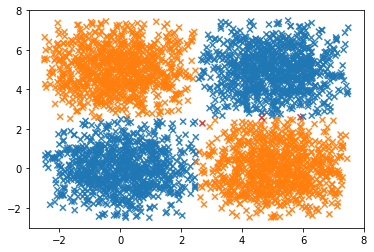

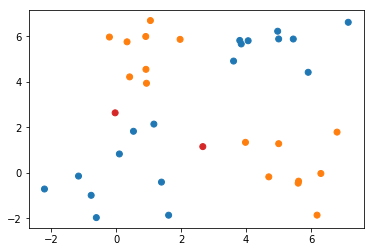

In [762]:
# my 1-layer neural network
n_neurons = 10
W_in = np.random.random((2,n_neurons)) 
b_in = np.random.random(n_neurons)
W_out = np.random.random((n_neurons,1))
b_out = np.random.random(1)

X_norm = (X - np.mean(X)) / np.std(X)
Xnew_norm = (Xnew - np.mean(Xnew)) / np.std(Xnew)

#################################
######### LEARNING RATE #########
learning_rate = 0.1
#################################

n_epoch = 200 # smaller learning rate means we will need more epochs
for e in range(n_epoch):
    error_rate = 0
    
    #################################
    ######### RANDOMIZATION #########
    randomize = np.arange(len(X_norm))
    np.random.shuffle(randomize)
    X_rand = X_norm[randomize]
    C_rand = C[randomize]
    #################################
    
    for n in range(len(X)):
        x = X_rand[n]
        x = np.expand_dims(x, axis=0) 
        l_in = np.dot(x, W_in)+b_in
        h = sigmoid(l_in) 
        l_out = np.dot(h, W_out)+b_out
        y = sigmoid(l_out)
        error = C_rand[n] - y
        error_rate += error**2
        y_delta = error * sigmoid(l_out, derivative=True) 
        h_delta = np.dot(y_delta,W_out.T) * sigmoid(l_in, derivative=True)
        
        #################################
        ### UPDATE WITH LEARNING RATE ###
        W_out += learning_rate * np.dot(h.T, y_delta)
        b_out += learning_rate * y_delta.squeeze()
        W_in += learning_rate * np.dot(x.T, h_delta)
        b_in += learning_rate * h_delta.squeeze()
        #################################
    if e%10 == 0:
        print("epoch:", e, "error:", error_rate/len(X))
    else :
        print("epoch:", e, "error:", error_rate/len(X), end="\r")

# plot the results 
pred_C = []
for n in range(len(Xnew)):
    x = Xnew_norm[n]
    h = sigmoid(np.dot(x, W_in)+b_in)
    y = sigmoid(np.dot(h, W_out)+b_out)
    pred_C.append(y)
pred_color = ["tab:orange" if p>=0.5 else "tab:blue" for p in pred_C ]

rw_pred_color = [pc if int(p>=0.5) == c  else "tab:red" for pc, p, c in zip(pred_color, pred_C, Cnew) ]

learned_C = []
for n in range(len(X)):
    x = X_norm[n]
    h = sigmoid(np.dot(x, W_in)+b_in)
    y = sigmoid(np.dot(h, W_out)+b_out)
    learned_C.append(y)
learned_color = ["tab:orange" if p>=0.5 else "tab:blue" for p in learned_C ]
rw_learned_color = [pc if int(p>=0.5) == c else "tab:red" for pc, p, c in zip(learned_color, learned_C, C) ]

plt.scatter(X[:,0], X[:,1], marker='x' ,c=rw_learned_color, alpha=0.9)
plt.show()
plt.scatter(Xnew[:,0], Xnew[:,1] ,c=rw_pred_color)
plt.show()

# Better ! 
## 1-hidden Layer Neural Networks has been proven to work

**Cybenko 1989**: Universal approximation theorem

<p style="width:100px;"><center><i> A feed-forward network with a single hidden layer (Shallow Neural network or SNN) containing a finite number of neurons $N$, can approximate any continuous functions on compact subsets of $\mathbb{R}^n$</i></center></p>


So, theorically we should be able do solve perfectly our problem by using only one hidden layer!
But:
- We don't know how many neurons are needed 
- We don't know which meta-parameters will help us
- It could take a long time to train


# One day, someone said

<img src="./wntgd.png" width="500" />

# Multi-layer Neural Network
Now that we have the learning algorithm for a one-hidden layer neural network, we can expend it to a N-hidden layer neural network. 

For instance let's try this one:

<img src="./mlnn.png" width="500" />

Now it's getting complex... 

Even arch to write! Look, the output $y$ can be written as :

$$ y = \varphi ( W_{3}^T .\varphi ( W_{2}^T . (\varphi (W_{1}^T . x + b_1) ) + b_2 ) +b_3 ) $$ 

- First layer : 4 neurons
- Second layer : 7 neurons
- Third layer : 5 neurons

----------------------------
### Learning procedure:
OKAY... we have now three layers .... learning algorithm is now :

> For each couple of *dot*/*color* ($\mathbf{x}$, $c$) of our dataset :
>> 1. We compute the output of our AN:
$$s_{1} = W_{1}.\mathbf{x} +b_{1} $$
$$h_{1} = \varphi ( s_{1}  ) $$
$$s_{2} = W_{2}.h_{1} +b_{2} $$
$$h_{2} = \varphi ( s_{2}  ) $$
$$s_{3} = W_{3}.h_{2} +b_{3} $$
$$h_{3} = \varphi ( s_{3}  ) $$
$$s_{out} = W_{out}.s_{3} +b_{out} $$
$$y = \varphi ( s_{out} ) $$
>> 2. We measure the error between the *expected output* $c$ and $y$:
$$ \mathcal{E} = c - y $$
>> 3. We compute the error due to the weights
$$ \delta_{out} = \mathcal{E} \times \varphi'(s_{out}) $$
$$ \delta_{3} = \delta_{out}^T.W_{out}  \times \varphi'(s_{3}) $$
$$ \delta_{2} = \delta_{3}^T.W_{3}  \times \varphi'(s_{2}) $$
$$ \delta_{1} = \delta_{2}^T.W_{2}  \times \varphi'(s_{1}) $$

>> 3. we update the weights:       
$$ W_{out} =  W_{out} + \eta. h_{3}^T. \delta_{out} $$
$$ b_{out} =  b_{out} + \eta. \delta_{out} $$
$$ W_{3} =  W_{3} + \eta. h_{2}^T. \delta_{3} $$
$$ b_{3} =  b_{3} + \eta. \delta_{3} $$
$$ W_{2} =  W_{2} + \eta. h_{1}^T. \delta_{2} $$
$$ b_{2} =  b_{2} + \eta. \delta_{2} $$
$$ W_{1} =  W_{1} + \eta. x^T. \delta_{1} $$
$$ b_{1} =  b_{1} + \eta. \delta_{1} $$


In [777]:
# 3-layer neural network definition 
n_in = 2
n_l1 = 4
n_l2 = 7
n_l3 = 5
n_out = 1

W1 = np.random.random((n_in,n_l1)) 
b1 = np.random.random(n_l1)

W2 = np.random.random((n_l1,n_l2))
b2 = np.random.random(n_l2)

W3 = np.random.random((n_l2,n_l3))
b3 = np.random.random(n_l3)

Wout = np.random.random((n_l3,n_out))
bout = np.random.random(n_out)

# normalization of the data (as always)
X_norm = (X - np.mean(X)) / np.std(X)
Xnew_norm = (Xnew - np.mean(Xnew)) / np.std(Xnew)



# here we define our learning rate ! 
learning_rate = 1
n_epoch = 500
for e in range(n_epoch):
    error_rate = 0
    
    #################################
    ######### RANDOMIZATION #########
    randomize = np.arange(len(X_norm))
    np.random.shuffle(randomize)
    X_rand = X_norm[randomize]
    C_rand = C[randomize]
    #################################
    
    for n in range(len(X)):
        x = X_rand[n]
        x = np.expand_dims(x, axis=0) # a little trick here
        # we compute the outputs of the first layer
        l1 = np.dot(x, W1)+b1
        h1 = sigmoid(l1) 
        l2 = np.dot(h1, W2)+b2
        h2 = sigmoid(l2) 
        l3 = np.dot(h2, W3)+b3
        h3 = sigmoid(l3) 
        lout = np.dot(h3, Wout)+bout
        y = sigmoid(lout) 
        # we compute the error
        error = C_rand[n] - y
        error_rate += error**2
        # we compute the delta for each layer
        ## first the delta between 
        delta_y = error * sigmoid(lout, derivative=True) 
        delta_h3 = np.dot(delta_y,Wout.T) * sigmoid(l3, derivative=True)
        delta_h2 = np.dot(delta_h3,W3.T) * sigmoid(l2, derivative=True)
        delta_h1 = np.dot(delta_h2,W2.T) * sigmoid(l1, derivative=True)

        Wout += learning_rate * np.dot(h3.T, delta_y)
        bout += learning_rate * delta_y.squeeze()
        W3 += learning_rate * np.dot(h2.T, delta_h3)
        b3 += learning_rate * delta_h3.squeeze()
        W2 += learning_rate * np.dot(h1.T, delta_h2)
        b2 += learning_rate * delta_h2.squeeze()
        W1 += learning_rate * np.dot(x.T, delta_h1)
        b1 += learning_rate * delta_h1.squeeze()
        
    if e%100 == 0:
        print("epoch:", e, "error:", error_rate/len(X))
        #let's update the learning_rate 
        learning_rate *= 0.5
    else :
        print("epoch:", e, "error:", error_rate/len(X), end="\r")

epoch: 0 error: [[0.26508724]]
epoch: 100 error: [[0.00099095]]
epoch: 200 error: [[0.00065202]]
epoch: 300 error: [[0.00028944]]05]]
epoch: 400 error: [[0.00014036]]05]]


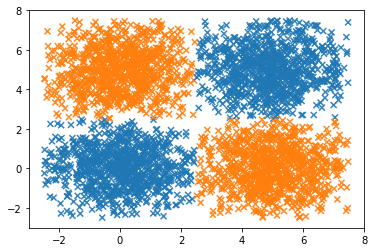

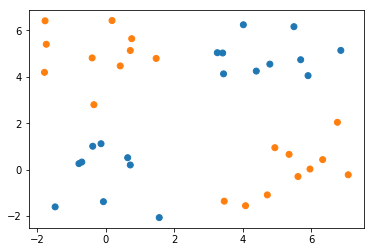

In [775]:
pred_C = []
for n in range(len(Xnew)):
    x = Xnew_norm[n]
    l1 = sigmoid(np.dot(x, W1)+b1)
    l2 = sigmoid(np.dot(l1, W2)+b2)
    l3 = sigmoid(np.dot(l2, W3)+b3)
    y = sigmoid(np.dot(l3, Wout)+bout)
    pred_C.append(y)
pred_color = ["tab:orange" if p>=0.5 else "tab:blue" for p in pred_C ]

rw_pred_color = [pc if int(p>=0.5) == c  else "tab:red" for pc, p, c in zip(pred_color, pred_C, Cnew) ]

learned_C = []
for n in range(len(X)):
    x = X_norm[n]
    l1 = sigmoid(np.dot(x, W1)+b1)
    l2 = sigmoid(np.dot(l1, W2)+b2)
    l3 = sigmoid(np.dot(l2, W3)+b3)
    y = sigmoid(np.dot(l3, Wout)+bout)
    learned_C.append(y)
learned_color = ["tab:orange" if p>=0.5 else "tab:blue" for p in learned_C ]
rw_learned_color = [pc if int(p>=0.5) == c else "tab:red" for pc, p, c in zip(learned_color, learned_C, C) ]

plt.scatter(X[:,0], X[:,1], marker='x' ,c=rw_learned_color, alpha=0.9)
plt.show()
plt.scatter(Xnew[:,0], Xnew[:,1] ,c=rw_pred_color)
plt.show()

# Et voilà :D